# Effects of Financial Characteristics on Loan Interest Rates

## Overview
In this investigation, I've focused on real life type of financial characteristics that lenders use to determine a loan interest rates. So characterics such as credit scores, delinquencies, term of the loan and so on is what I will compare to interest rates.

## Dataset Overview
This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. After cleaning up a bit in Part one, I've used an updated master on this presentation.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

pd.set_option('display.float_format', '{:0.2f}'.format)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df = pd.read_csv('loans.csv')

In [4]:
# change term data type
term_order = [12, 36, 60]
term_ordered = pd.api.types.CategoricalDtype(categories=term_order, ordered=True)
df['term'] = df['term'].astype(term_ordered)

## Distribution of Terms
Majority of loans, about 75% were 36 terms. Followed by 24% at 60 terms and small 1.5% at 12 terms.

In [5]:
# extract term counts
n_df = df.shape[0]
term_counts = df['term'].value_counts()
max_term_count = term_counts[1]
max_term_prop = max_term_count / n_df
print(max_term_prop)

0.7483611056452532


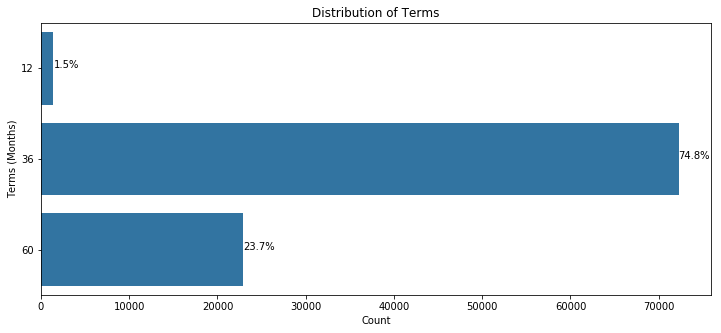

In [6]:
base_color = sb.color_palette()[0]

plt.figure(figsize=(12,5))
sb.countplot(data=df, y='term', color=base_color)
plt.title('Distribution of Terms')
plt.ylabel('Terms (Months)')
plt.xlabel('Count')

for i in range(term_counts.shape[0]):
    count = term_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_df)
    plt.text(count+1, i, pct_string)

## Distribution of Credit Scores
Majority of credit scores fell between 650 and 750.

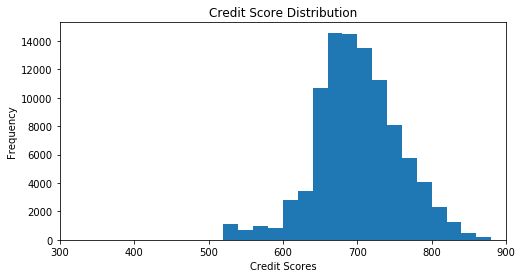

In [7]:
plt.figure(figsize=(8, 4))
bins = np.arange(0, df['creditscorerangelower'].max()+20, 20)
plt.hist(data=df, x='creditscorerangelower', bins=bins)
plt.xlim((300, 900))
plt.title('Credit Score Distribution')
plt.ylabel('Frequency')
plt.xlabel('Credit Scores');

## Distribution of Loan Amounts
Majority of loans taken out fall between a 1000 to 10000. Couple outliers in the 20000 to 35000 range.

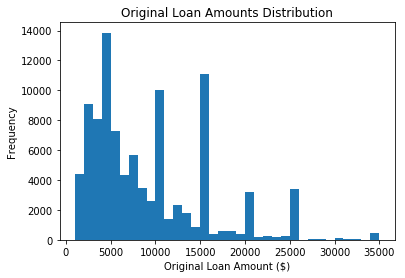

In [8]:
bins = np.arange(1000, df['loanoriginalamount'].max()+20, 1000)
plt.hist(data=df, x='loanoriginalamount', bins=bins)
plt.title('Original Loan Amounts Distribution')
plt.ylabel('Frequency')
plt.xlabel('Original Loan Amount ($)');

## Distribution of Original Loan Amount by Terms
The smaller the term the smaller the loan in this case.

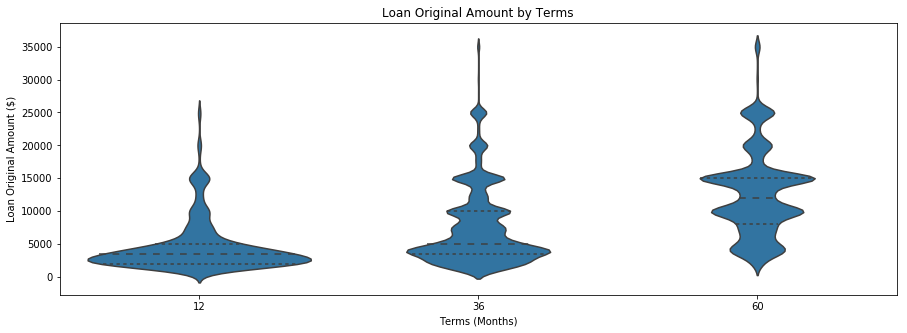

In [9]:
plt.figure(figsize=(15,5))
sb.violinplot(data=df, x='term', y='loanoriginalamount', inner='quartile', color=base_color);
plt.title('Loan Original Amount by Terms')
plt.xlabel('Terms (Months)')
plt.ylabel('Loan Original Amount ($)');

## Distribution of Interest Rates by Terms
Here it seems like the lower the term the lower the interest rate. 36 terms varies the most between low interest and high interest.

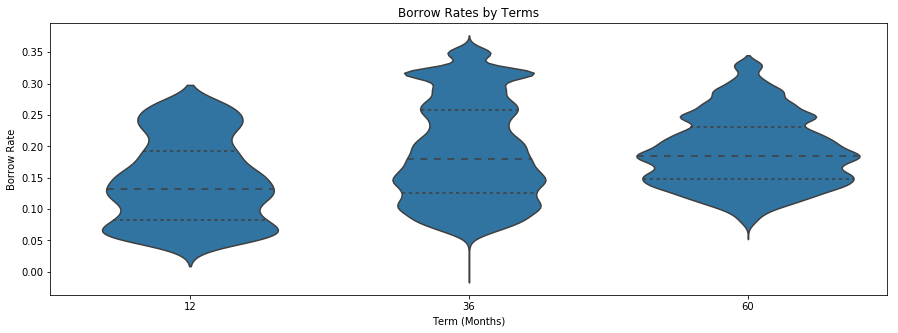

In [10]:
plt.figure(figsize=(15,5))
sb.violinplot(data=df, x='term', y='borrowerrate', inner='quartile', color=base_color);
plt.title('Borrow Rates by Terms')
plt.xlabel('Term (Months)')
plt.ylabel('Borrow Rate');

## Distribution of Loan Original Amount and Interest Rates by Employment Status
Majority of high amounts of loan went to self-employed and employed while they also paid less interest than most.

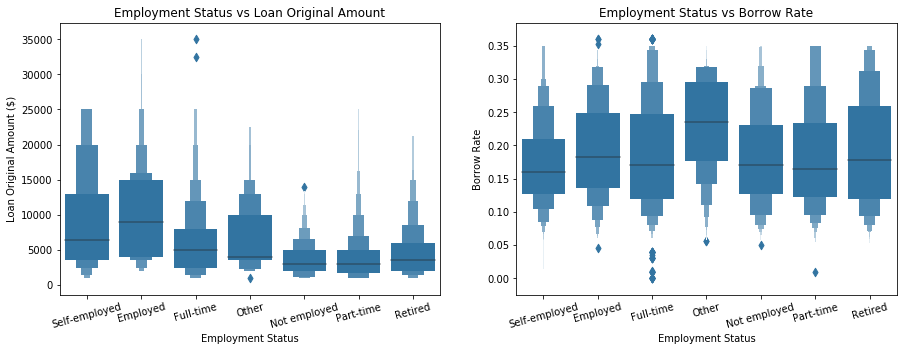

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sb.boxenplot(data=df, x='employmentstatus', y='loanoriginalamount', color=base_color)
plt.xticks(rotation=15)
plt.title('Employment Status vs Loan Original Amount')
plt.xlabel('Employment Status')
plt.ylabel('Loan Original Amount ($)');

plt.subplot(1, 2, 2)
sb.boxenplot(data=df, x='employmentstatus', y='borrowerrate', color=base_color)
plt.xticks(rotation=15);
plt.title('Employment Status vs Borrow Rate')
plt.xlabel('Employment Status')
plt.ylabel('Borrow Rate');

## Distribution of Credit Scores by Employment Status
**warning: the y scale is nor shared because some were much more in data than others.**
Only those who are employed and other category has credit score higher than 600 while some of those with self-employed status had lower than 600 suggesting that they had collateral or the like.

<Figure size 432x720 with 0 Axes>

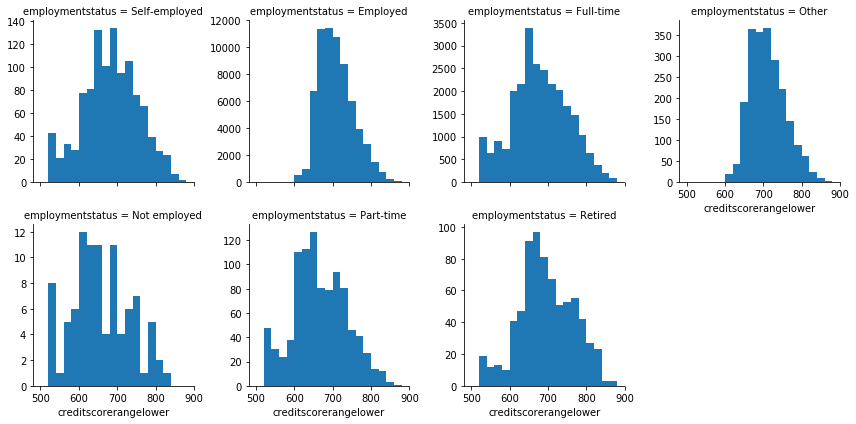

In [13]:
plt.figure(figsize=(6,10))
bins = np.arange(500, 880+20, 20)
g = sb.FacetGrid(data=df, col='employmentstatus', col_wrap=4, sharey=False)
g.map(plt.hist, 'creditscorerangelower', bins=bins);

## Interest Rates vs Credit Scores
Having above 700 credit score shows that interest rates begin to decline with those over 800 saving the most in interest charges.

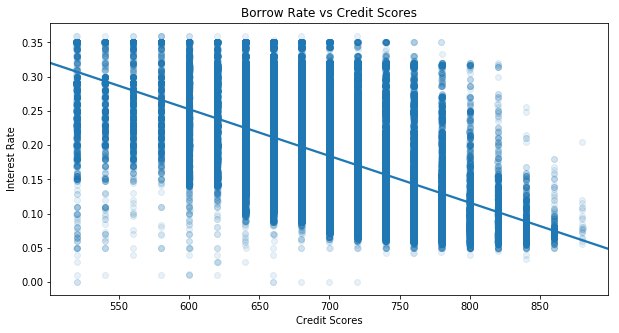

In [14]:
plt.figure(figsize=(10, 5))
sb.regplot(data=df, x='creditscorerangelower', y='borrowerrate',
          x_jitter=0.3, scatter_kws={'alpha': 1/10});
plt.title('Borrow Rate vs Credit Scores')
plt.xlabel('Credit Scores')
plt.ylabel('Interest Rate');

## Interest Rates vs Debt-To-Income Ratio
Having high debt-to-income ratio means having higher interest rates.

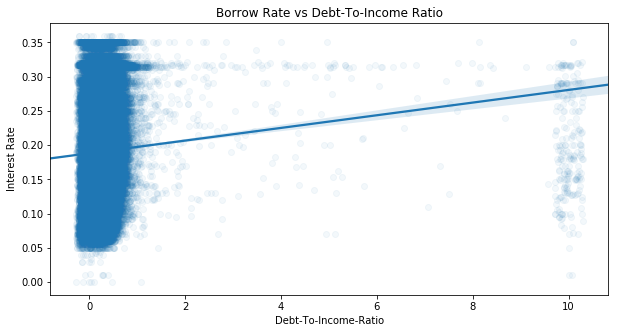

In [15]:
plt.figure(figsize=(10,5))
sb.regplot(data=df, x='debttoincomeratio', y='borrowerrate',
          x_jitter=0.3, scatter_kws={'alpha': 1/20});
plt.title('Borrow Rate vs Debt-To-Income Ratio')
plt.xlabel('Debt-To-Income-Ratio')
plt.ylabel('Interest Rate');

## Interest Rates vs Total Inquiries
The more inquiries the higher interest rate, suggesting lenders believe the applicant to be desperate which is a risk.

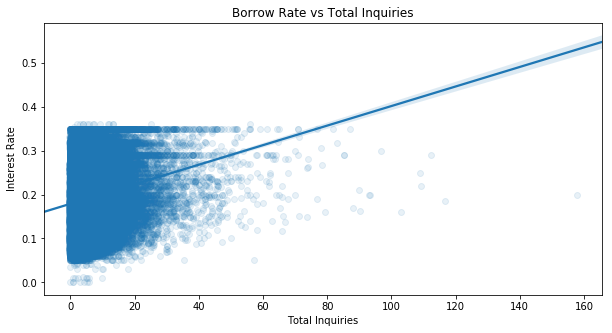

In [16]:
plt.figure(figsize=(10, 5))
sb.regplot(data=df, x='totalinquiries', y='borrowerrate', 
           x_jitter=0.3, scatter_kws={'alpha': 1/10});
plt.title('Borrow Rate vs Total Inquiries')
plt.xlabel('Total Inquiries')
plt.ylabel('Interest Rate');

## Interest Rates vs Employment Duration
This one suprised me most, I would assume having higher employment duration would be a good factor in interest rate but had almost no effect.

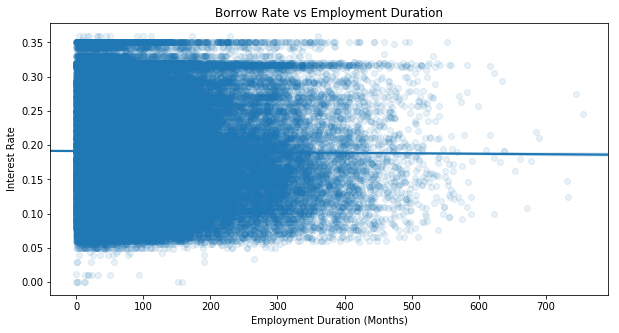

In [17]:
plt.figure(figsize=(10, 5))
sb.regplot(data=df, x='employmentstatusduration', y='borrowerrate', 
           x_jitter=0.3, scatter_kws={'alpha': 1/10});
plt.title('Borrow Rate vs Employment Duration')
plt.xlabel('Employment Duration (Months)')
plt.ylabel('Interest Rate');

## Interest Rates vs Deliquencies
Deliquencies absolutely effect interest rates as they are seen as high risk

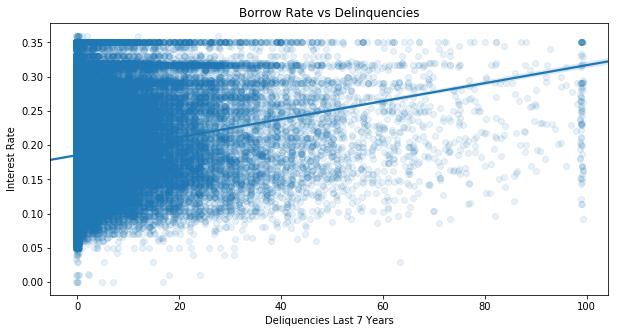

In [18]:
plt.figure(figsize=(10, 5))
sb.regplot(data=df, x='delinquencieslast7years', y='borrowerrate', 
           x_jitter=0.3, scatter_kws={'alpha': 1/10});
plt.title('Borrow Rate vs Delinquencies')
plt.xlabel('Deliquencies Last 7 Years')
plt.ylabel('Interest Rate');

## Homeownership on Credit Score vs Borrow Rates
- There's very little effect homeownership has on credit scores v interest rate. In fact in the beggining homeownership seems to be a disadvantage, maybe because lenders believe the borrower is already heavily indebted with a score that low.

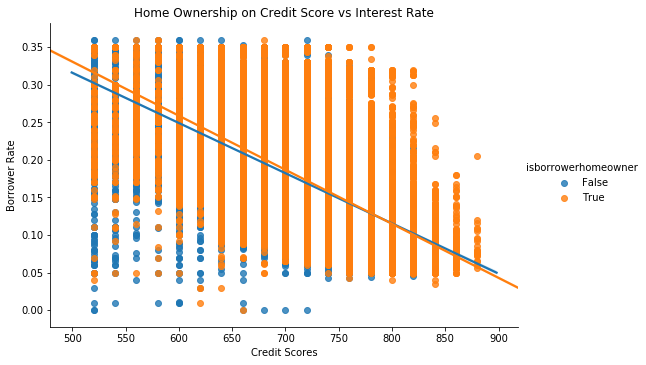

In [19]:
sb.lmplot(data=df, x='creditscorerangelower', y='borrowerrate', hue='isborrowerhomeowner', aspect=1.5);
plt.title('Home Ownership on Credit Score vs Interest Rate')
plt.xlabel('Credit Scores')
plt.ylabel('Borrower Rate');

## Terms on Credit Score vs Borrow Rate
- Slightly, the longer the term the higher the interest rate for same credit scores.

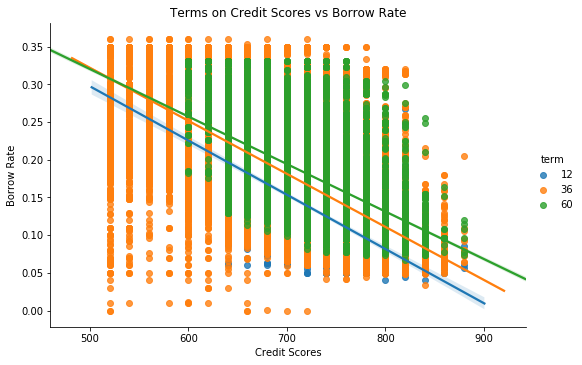

In [20]:
sb.lmplot(data=df, x='creditscorerangelower', y='borrowerrate', hue='term', aspect=1.5)
plt.title('Terms on Credit Scores vs Borrow Rate')
plt.xlabel('Credit Scores')
plt.ylabel('Borrow Rate');

## Employment Status on Credit Scores vs Borrow Rate
- Overall, even though there's alot more people who are employed with low scores and high borrow rates. Being employed does seem to have lower borrow rates for same amount of credit scores.

In [21]:
df['employment_status_cat'] = np.where(df['employmentstatus'].isin(['Self-employed',
                                'Employed','Full-time', 'Part-time']), 
         "Employed", "Not-Employed/Other")

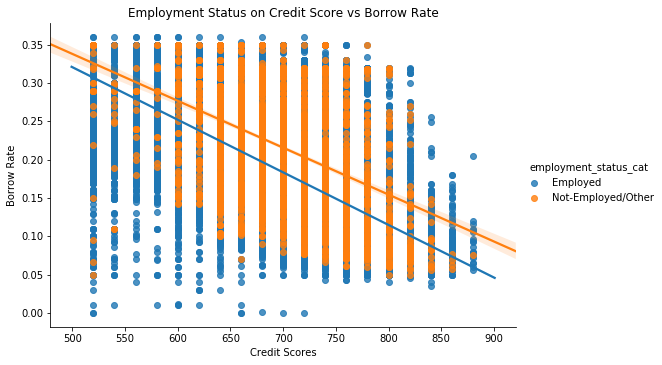

In [22]:
sb.lmplot(data=df, x='creditscorerangelower', y='borrowerrate', hue='employment_status_cat', aspect=1.5)
plt.title('Employment Status on Credit Score vs Borrow Rate')
plt.xlabel('Credit Scores')
plt.ylabel('Borrow Rate');